In [72]:
# Load dataframe and packages
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv("dropped_col_df.csv")

In [73]:
# Creating the columns Female and Male
df_one = pd.get_dummies(df["GENDER"])
df['FEMALE'] = df_one.F
df['MALE'] = df_one.M
df


,Unnamed: 0,COD_S11,GENDER,EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,STRATUM,SISBEN,PEOPLE_HOUSE,...,WC_PRO,FEP_PRO,G_SC,PERCENTILE,2ND_DECILE,QUARTILE,SEL,SEL_IHE,FEMALE,MALE
0,0,SB11201210000129,F,Incomplete Professional Education,Complete technique or technology,Technical or professional level employee,Home,Stratum 4,It is not classified by the SISBEN,Three,...,79,181,180,91,5,4,2,2,1,0
1,1,SB11201210000137,F,Complete Secundary,Complete professional education,Entrepreneur,Independent professional,Stratum 5,It is not classified by the SISBEN,Three,...,78,201,182,92,5,4,4,4,1,0
2,2,SB11201210005154,M,Not sure,Not sure,Independent,Home,Stratum 2,Level 2,Five,...,22,113,113,7,1,1,1,1,0,1
3,3,SB11201210007504,F,Not sure,Not sure,Other occupation,Independent,Stratum 2,It is not classified by the SISBEN,Three,...,48,137,157,67,4,3,2,2,1,0
4,4,SB11201210007548,M,Complete professional education,Complete professional education,Executive,Home,Stratum 4,It is not classified by the SISBEN,One,...,71,189,198,98,5,4,4,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12406,12406,SB11201420568705,M,Ninguno,Complete Secundary,Other occupation,Auxiliary or Administrative,Stratum 2,It is not classified by the SISBEN,Six,...,65,142,176,88,5,4,2,2,0,1
12407,12407,SB11201420573045,M,Complete professional education,Complete Secundary,Executive,Other occupation,Stratum 2,Level 2,Five,...,0,127,107,4,1,1,4,2,0,1
12408,12408,SB11201420578809,M,Complete technique or technology,Complete technique or technology,Retired,Home,Stratum 2,Level 2,Five,...,87,192,188,95,5,4,2,2,0,1
12409,12409,SB11201420578812,F,Complete professional education,Complete professional education,Independent professional,Small entrepreneur,Stratum 3,It is not classified by the SISBEN,Seven,...,42,121,146,50,3,3,3,2,1,0


In [94]:
df.STRATUM.value_counts()
df.SISBEN.value_counts()


It is not classified by the SISBEN           7534
Level 2                                      2120
Level 1                                      2057
Level 3                                       583
Esta clasificada en otro Level del SISBEN      96
0                                              21
Name: SISBEN, dtype: int64

In [74]:
df_classes = df.copy()
df_SEL = pd.get_dummies(df_classes["SEL"])
df_SEL_IHE = pd.get_dummies(df_classes["SEL_IHE"])

df_SEL

,1,2,3,4
0,0,1,0,0
1,0,0,0,1
2,1,0,0,0
3,0,1,0,0
4,0,0,0,1
...,...,...,...,...
12406,0,1,0,0
12407,0,0,0,1
12408,0,1,0,0
12409,0,0,1,0


In [84]:
df_SEL = df_SEL.rename(columns={1:"SEL_1",2:'SEL_2',3:'SEL_3',4:'SEL_4'})
df_SEL_IHE = df_SEL_IHE.rename(columns={1:"SEL_IHE_1",2:'SEL_IHE_2',3:'SEL_IHE_3',4:'SEL_IHE_4'})

result = pd.concat([df_SEL, df_SEL_IHE], axis=1)
result


,SEL_1,SEL_2,SEL_3,SEL_4,SEL_IHE_1,SEL_IHE_2,SEL_IHE_3,SEL_IHE_4
0,0,1,0,0,0,1,0,0
1,0,0,0,1,0,0,0,1
2,1,0,0,0,1,0,0,0
3,0,1,0,0,0,1,0,0
4,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
12406,0,1,0,0,0,1,0,0
12407,0,0,0,1,0,1,0,0
12408,0,1,0,0,0,1,0,0
12409,0,0,1,0,0,1,0,0


<AxesSubplot:>

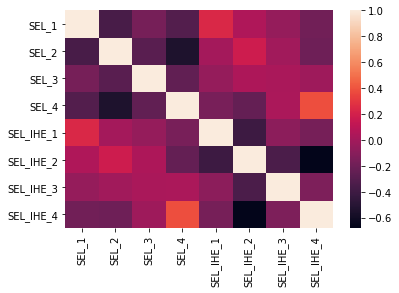

In [85]:
sns.heatmap(result.corr())

C:\Users\bayka\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='STRATUM', ylabel='SEL'>

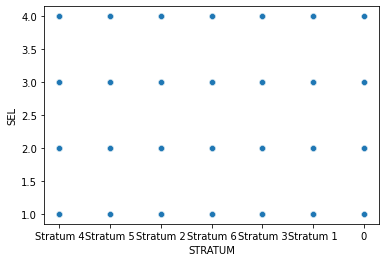

In [95]:
sns.scatterplot(df.STRATUM)

In [89]:
def barchart(
    x,
    y,
    ylabel,
    style="white",
    rc_style=None,
    context=None,
    font_scale=None,
    rc_context=None,
):
    with sns.axes_style(style=style, rc=rc_style), sns.plotting_context(
        context=context, font_scale=font_scale, rc=rc_context
    ):
        ax = sns.barplot(x=x, y=y, ci=None, color=Palette)

    num_decimals = ".1f"
    if max(y) < 1:
        num_decimals = ".2f"
    for p in ax.patches:
        ax.annotate(
            format(p.get_height(), num_decimals),
            (p.get_x() + p.get_width() / 2.0, p.get_height()),
            ha="center",
            va="center",
            xytext=(0, 9),
            textcoords="offset points",
        )
    ax.set_ylabel(ylabel)  # fixed size?
    # plt.xlabel("", size=14)
    # plt.xticks(rotation=-30, ha="left")
    #     plt.title(f'{filename}', size=20)
    ax.set(xlabel=None)
    # ax.tick_params(labelsize=10)
    sns.despine(bottom=True, left=True)

    return ax
barchart(df.MALE,df.FEMALE,'her')

NameError: name 'Red' is not defined

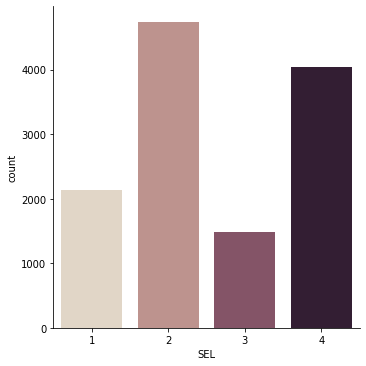

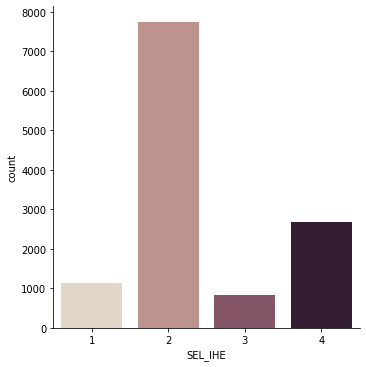

In [54]:
sns.catplot(x="SEL", kind="count", palette="ch:.25", data=df)
sns.catplot(x="SEL_IHE", kind="count", palette="ch:.25", data=df)


<AxesSubplot:>

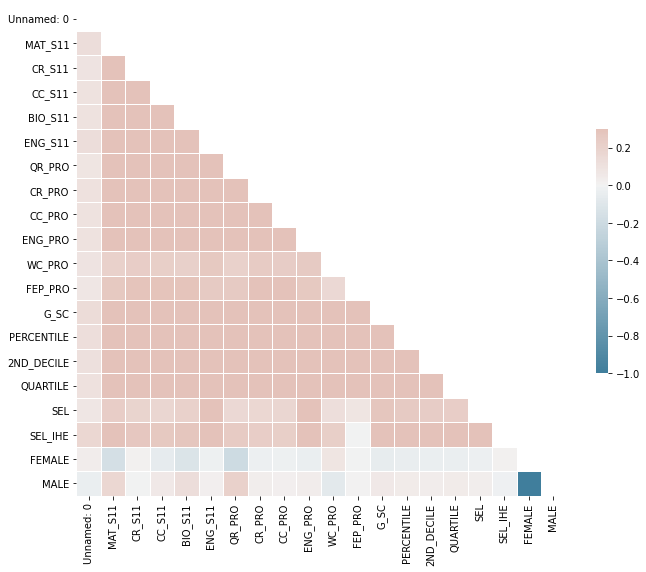

In [49]:

import matplotlib.pyplot as plt

corr = df.corr()


# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Plots ideas

- Distribution of men and women in the dataset. 
- kdkdk
- kdkdk


Different kinds of plots: 
- boxplot
    - 
- lineplot
- histogram
- scatterplot
- 

Categorical scatterplots:

stripplot() (with kind="strip"; the default)

swarmplot() (with kind="swarm")

Categorical distribution plots:

boxplot() (with kind="box")

violinplot() (with kind="violin")

boxenplot() (with kind="boxen")

Categorical estimate plots:

pointplot() (with kind="point")

barplot() (with kind="bar")

countplot() (with kind="count")

In [25]:
# df.groupby(df.GENDER, df.ENG_PRO)
df_GENDER_ENG_PRO = df.groupby(by=["GENDER"]).count()
df_GENDER_ENG_PRO

,COD_S11,EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,STRATUM,SISBEN,PEOPLE_HOUSE,Unnamed: 9,INTERNET,...,CC_PRO,ENG_PRO,WC_PRO,FEP_PRO,G_SC,PERCENTILE,2ND_DECILE,QUARTILE,SEL,SEL_IHE
GENDER,,,,,,,,,,,,,,,,,,,,,
F,5043,5043,5043,5043,5043,5043,5043,5043,0,5043,...,5043,5043,5043,5043,5043,5043,5043,5043,5043,5043
M,7368,7368,7368,7368,7368,7368,7368,7368,0,7368,...,7368,7368,7368,7368,7368,7368,7368,7368,7368,7368


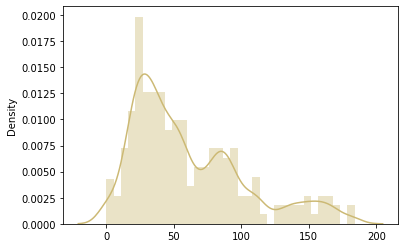

In [20]:
# Lav sådan et hvor vi har kvinders karakterer og mænds karakterer
#  kvindernes overordede gennemsnits karakterer
sns.set_color_codes()
ax = sns.distplot(df_GENDER_ENG_PRO, color="y")

In [34]:
# subs_per_day = wallstreet_subs.groupby("created_date", as_index=False).aggregate(["sum"])


In [35]:
# Distribution of men and women 
# group by gender and university?

12411

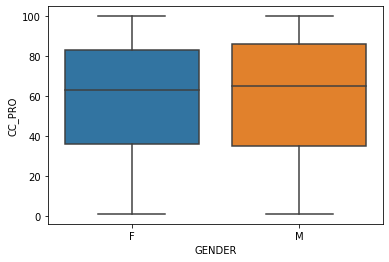

In [36]:
# Import seaborn
import seaborn as sns



# Create a visualization
sns.boxplot(
    data=df,
    x="GENDER", y="CC_PRO"
)
df.GENDER.count()

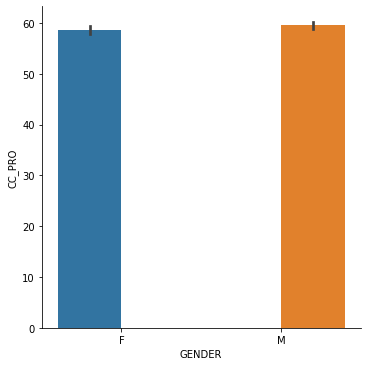

In [37]:
sns.catplot(data=df, kind="bar", x="GENDER", y="", hue="GENDER")

In [14]:
dff

,Unnamed: 0,COD_S11,GENDER,EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,STRATUM,SISBEN,PEOPLE_HOUSE,...,CC_PRO,ENG_PRO,WC_PRO,FEP_PRO,G_SC,PERCENTILE,2ND_DECILE,QUARTILE,SEL,SEL_IHE
0,0,SB11201210000129,F,Incomplete Professional Education,Complete technique or technology,Technical or professional level employee,Home,Stratum 4,It is not classified by the SISBEN,Three,...,71,93,79,181,180,91,5,4,2,2
1,1,SB11201210000137,F,Complete Secundary,Complete professional education,Entrepreneur,Independent professional,Stratum 5,It is not classified by the SISBEN,Three,...,86,98,78,201,182,92,5,4,4,4
2,2,SB11201210005154,M,Not sure,Not sure,Independent,Home,Stratum 2,Level 2,Five,...,18,43,22,113,113,7,1,1,1,1
3,3,SB11201210007504,F,Not sure,Not sure,Other occupation,Independent,Stratum 2,It is not classified by the SISBEN,Three,...,76,80,48,137,157,67,4,3,2,2
4,4,SB11201210007548,M,Complete professional education,Complete professional education,Executive,Home,Stratum 4,It is not classified by the SISBEN,One,...,98,100,71,189,198,98,5,4,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12406,12406,SB11201420568705,M,Ninguno,Complete Secundary,Other occupation,Auxiliary or Administrative,Stratum 2,It is not classified by the SISBEN,Six,...,86,87,65,142,176,88,5,4,2,2
12407,12407,SB11201420573045,M,Complete professional education,Complete Secundary,Executive,Other occupation,Stratum 2,Level 2,Five,...,44,11,0,127,107,4,1,1,4,2
12408,12408,SB11201420578809,M,Complete technique or technology,Complete technique or technology,Retired,Home,Stratum 2,Level 2,Five,...,90,81,87,192,188,95,5,4,2,2
12409,12409,SB11201420578812,F,Complete professional education,Complete professional education,Independent professional,Small entrepreneur,Stratum 3,It is not classified by the SISBEN,Seven,...,51,8,42,121,146,50,3,3,3,2
